3.1 Introduction à Numpy

In [2]:
import numpy as np

a)Étudions la documentation de la fonction arange et utilisons cette fonction pour générer les vecteurs (5,6,7,8,9) et (3,5,7,9).

In [4]:
array=np.arange(5, 10)
array1=np.arange(3,10,2)
print(array)
print(array1)

[5 6 7 8 9]
[3 5 7 9]


b)Étudions la documentation de la fonction linspace et l'utiliser pour générer 10 points équidistribués dans l'intervalle [2,5]

In [5]:
array=np.linspace(2, 5, 10)
print(array)

[2.         2.33333333 2.66666667 3.         3.33333333 3.66666667
 4.         4.33333333 4.66666667 5.        ]


c)La fonction reshape permet de transformer des vecteurs en matrices et changer la dimension de matrices :

In [6]:
a = np.arange(1, 7)
print(a)
a= np.reshape(a,(3, 2))
print(a)
a = np.reshape(a, (2,3))
print(a)
a= np.reshape(a,6)
a= np.reshape(a, (3,2), 'F')
print(a)

[1 2 3 4 5 6]
[[1 2]
 [3 4]
 [5 6]]
[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]


3.2 Opérations sur les tableaux

a)Donné un vecteur $(v_0,v_1,\dots,v_{n-1})\in\mathbb{R}^n$ la dérivée discrète de ce vecteur est définie par le vecteur $(d_0,d_1,\dots,d_{n-2})\in\mathbb{R}^{n-1}$ donné par $d_i = v_{i+1}-v_{i}$ pour $i=0,1,\dots,n-2$.

Écrivons une fonction `diff_list` qui calcule la dérivée discrète d'une liste et une fonction `diff_np` qui fait la même opération mais sur des vecteurs Numpy en utilisant le slicing.

In [4]:
def diff_list(data):
    # Boucle explicite pour calculer les différences successives
    return [data[i] - data[i-1] for i in range(1, len(data))]
print(diff_list([1, 2, 3, 4, 5]))

[1, 1, 1, 1]


In [5]:
def diff_np(data):
    # Opération vectorisée native de NumPy pour les différences successives
    return np.diff(data)
print(diff_np(np.array([1,2,3,4,5])))

[1 1 1 1]


b)Soit `a_list` et `a_np` respectivement une liste et un tableau de 1 000 éléments tirés au hasard dans l'intervalle [0,1]:

In [10]:
SETUP_CODE = '''
import numpy as np
from __main__ import diff_list, diff_np, a_list, a_np
'''

TIME_LIST = timeit.timeit(
    stmt='diff_list(a_list)',
    setup=SETUP_CODE,
    number=10000 # Exécute 10000 fois
)

TIME_NP = timeit.timeit(
    stmt='diff_np(a_np)',
    setup=SETUP_CODE,
    number=10000 # Exécute 10000 fois
)

print(f"Liste Python (x 10000) : {TIME_LIST:.4f} secondes")
print(f"Array NumPy (x 10000) : {TIME_NP:.4f} secondes")
print(f"NumPy est environ {TIME_LIST / TIME_NP:.1f} fois plus rapide.")

Liste Python (x 10000) : 0.9576 secondes
Array NumPy (x 10000) : 0.0855 secondes
NumPy est environ 11.2 fois plus rapide.


Exercice 3.3 Représentation graphique

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

a)Représentons graphiquement sur la même figure les fonctions $\sin(kx)$ et $\cos(kx)$ pour $k=1,2,3$ pour $x\in[0,2\pi]$. Faire en sorte que les graduations sur l'axe horizontal soient tous les $\frac{\pi}{2}$:

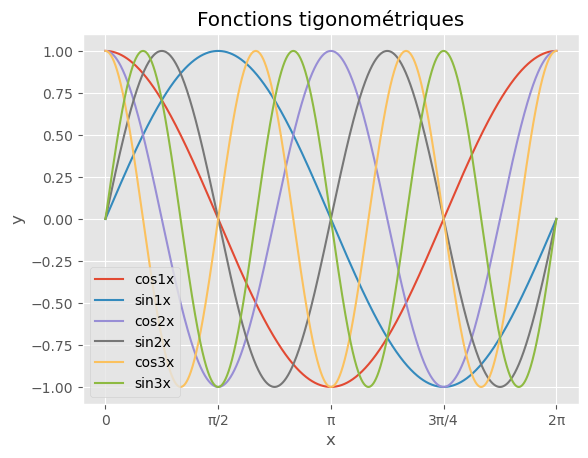

In [41]:
x = np.linspace(0,2*np.pi, 10000)
for i in range(3):
    plt.plot(x,np.cos((i+1)*x), label="cos{}x".format(i+1))
    plt.plot(x,np.sin((i+1)*x), label="sin{}x".format(i+1))

plt.xticks(np.arange(0, 2*np.pi+np.pi/2, step=np.pi/2), ['0', 'π/2', 'π', '3π/4', '2π'])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Fonctions tigonométriques")
plt.legend()

plt.show()

b)Utilisation de la fonction `imshow` via la représentation graphique d'une matrice de nombres aléatoires dans $[0,1]$ de taille $10\times10$:

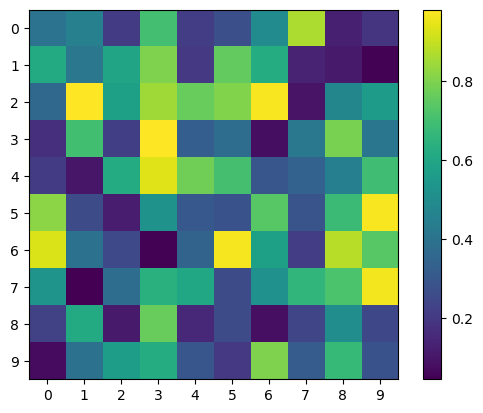

In [11]:
A = np.random.random((10, 10))
fig, ax = plt.subplots()
plt.xticks(np.arange(0, 10, 1))
plt.yticks(np.arange(0, 10, 1))
im=ax.imshow(A)
cbar = fig.colorbar(im, ax=ax)



c) Représentons graphiquement la fonction $f(x,y) = \frac{-y}{5} + e^{-x^2-y^2}$ pour $x\in[-3,3]$ et $y\in[-3,3]$ en densité et avec des courbes de niveau:

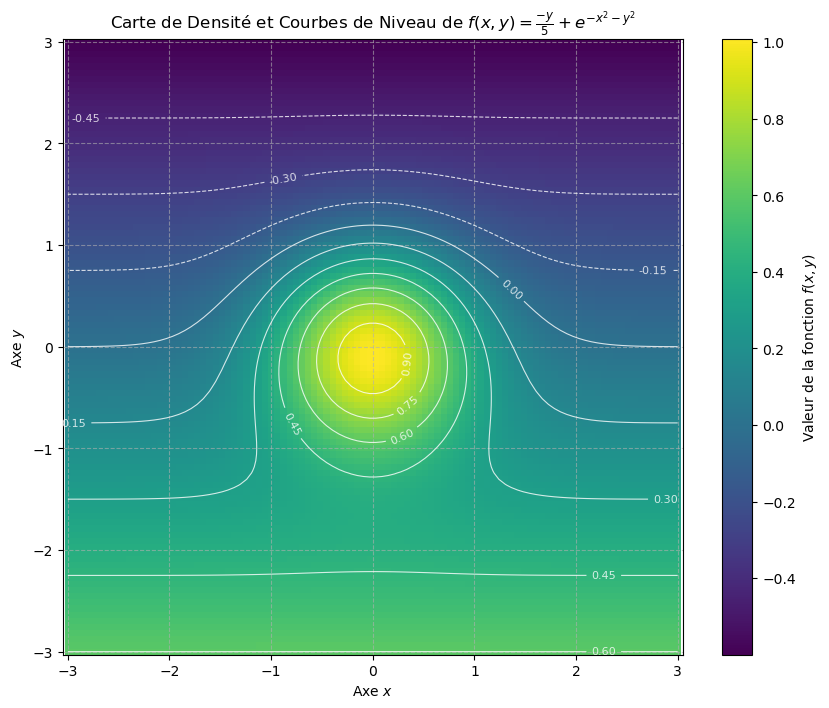

In [13]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

X, Y = np.meshgrid(x, y)

Z = (-Y / 5) + np.exp(-X**2 - Y**2)

plt.figure(figsize=(10, 8))

density_map = plt.pcolormesh(X, Y, Z, shading='auto', cmap='viridis')

plt.colorbar(density_map, label='Valeur de la fonction $f(x,y)$')

contour_lines = plt.contour(X, Y, Z, levels=15, colors='white', linewidths=0.8, alpha=0.8)

plt.clabel(contour_lines, inline=True, fontsize=8, fmt='%1.2f')

plt.title(r'Carte de Densité et Courbes de Niveau de $f(x,y) = \frac{-y}{5} + e^{-x^2-y^2}$')
plt.xlabel('Axe $x$')
plt.ylabel('Axe $y$')
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()